# Identification
* **Student Name:** Vi Nguyen
* **Student ID:** 13592629



In [1]:
# 3. Import statements
import numpy as np
import pandas as pd
import apmodule as ap
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10 
plt.rcParams['lines.linewidth'] = 3
%matplotlib inline
from scipy import stats


In [2]:
# 4. user-generate function

In [3]:
# 5. loading of all the files.
prices = pd.read_csv('Prices.zip', parse_dates=['date']).set_index(['id', 'date'])
quality_signal = pd.read_csv('QUALITY.zip', parse_dates=['date']).set_index(['id', 'date']) 
growth_signal = pd.read_csv('GROWTH.zip', parse_dates=['date']).set_index(['id', 'date']) 
profit_signal = pd.read_csv('PROFIT.zip', parse_dates=['date']).set_index(['id', 'date']) 
safety_signal = pd.read_csv('SAFETY.zip', parse_dates=['date']).set_index(['id', 'date']) 
market_cap = pd.read_csv('Market_cap.zip', parse_dates=['date']).set_index(['id', 'date']) 
names = pd.read_csv('names.zip').set_index(['id', 'name']) 
macro_eco = pd.read_csv('macro.csv')


_____________________________________________________________________________________________________________________


## Part 2: Infomation Coefficient
Test the predictive power of the Quality factor and of its three sub-components 
- 2.1 Testing Quality Signal
- 2.2 Testing Growth Signal
- 2.3 Testing Profit Signal
- 2.4 Testing Safety Signal
- 2.5 Combine and display

**2.1 Testing Quality Signal**

In [4]:
quality_signal_ic = ap.ic_analysis(quality_signal['quality'], prices['price'], frequency='annual')
quality_signal_ic.head()

Average IC: 0.063 

Percentage of Positive Periods: 0.786 

Percentage of Negative Periods: 0.214 

T-Stat: 4.418 P-Value: 0.0 



date
1980-12-31    0.106882
1981-12-31    0.140836
1982-12-31   -0.048186
1983-12-30    0.202670
1984-12-31    0.222778
Name: IC_quality, dtype: float64

In [5]:
monthly_quality_signal_ic = ap.ic_analysis(quality_signal['quality'], prices['price'], frequency='monthly')
monthly_quality_signal_ic.head()

Average IC: 0.036 

Percentage of Positive Periods: 0.703 

Percentage of Negative Periods: 0.297 

T-Stat: 10.19 P-Value: 0.0 



date
1980-01-31    0.027434
1980-02-29    0.243957
1980-03-31    0.071162
1980-04-30    0.029996
1980-05-30    0.088722
Name: IC_quality, dtype: float64

**2.2 Testing Growth Signal**

In [6]:
growth_signal_ic = ap.ic_analysis(growth_signal['growth'], prices['price'], frequency='annual')
growth_signal_ic.head()

Average IC: 0.062 

Percentage of Positive Periods: 0.791 

Percentage of Negative Periods: 0.209 

T-Stat: 6.217 P-Value: 0.0 



date
1979-12-31    0.075387
1980-12-31    0.046414
1981-12-31    0.100866
1982-12-31   -0.017647
1983-12-30    0.100706
Name: IC_growth, dtype: float64

In [7]:
monthly_growth_signal_ic = ap.ic_analysis(growth_signal['growth'], prices['price'], frequency='monthly')
monthly_growth_signal_ic.head()

Average IC: 0.031 

Percentage of Positive Periods: 0.713 

Percentage of Negative Periods: 0.287 

T-Stat: 11.842 P-Value: 0.0 



date
1979-01-31   -0.064215
1979-02-28   -0.029302
1979-03-30    0.003248
1979-04-30    0.076621
1979-05-31    0.009675
Name: IC_growth, dtype: float64

**2.3 Testing Profit Signal**

In [8]:
profit_signal_ic = ap.ic_analysis(profit_signal['profit'], prices['price'], frequency='annual')
profit_signal_ic.head()

Average IC: 0.116 

Percentage of Positive Periods: 0.907 

Percentage of Negative Periods: 0.093 

T-Stat: 9.206 P-Value: 0.0 



date
1979-12-31    0.082010
1980-12-31    0.057674
1981-12-31    0.104998
1982-12-31    0.066374
1983-12-30    0.189919
Name: IC_profit, dtype: float64

In [9]:
monthly_profit_signal_ic = ap.ic_analysis(profit_signal['profit'], prices['price'], frequency='monthly')
monthly_profit_signal_ic.head()

Average IC: 0.062 

Percentage of Positive Periods: 0.833 

Percentage of Negative Periods: 0.167 

T-Stat: 18.184 P-Value: 0.0 



date
1979-01-31   -0.044761
1979-02-28    0.014391
1979-03-30    0.024918
1979-04-30    0.008588
1979-05-31   -0.048699
Name: IC_profit, dtype: float64

**2.4 Testing Safety Signal**

In [10]:
safety_signal_ic = ap.ic_analysis(safety_signal['safety'], prices['price'], frequency='annual')
safety_signal_ic.head()

Average IC: 0.043 

Percentage of Positive Periods: 0.738 

Percentage of Negative Periods: 0.262 

T-Stat: 3.063 P-Value: 0.004 



date
1980-12-31    0.027108
1981-12-31    0.110120
1982-12-31   -0.042867
1983-12-30    0.156059
1984-12-31    0.183768
Name: IC_safety, dtype: float64

In [11]:
monthly_safety_signal_ic = ap.ic_analysis(safety_signal['safety'], prices['price'], frequency='monthly')
monthly_safety_signal_ic.head()

Average IC: 0.026 

Percentage of Positive Periods: 0.678 

Percentage of Negative Periods: 0.322 

T-Stat: 7.858 P-Value: 0.0 



date
1980-01-31    0.021856
1980-02-29    0.099560
1980-03-31   -0.112640
1980-04-30    0.030566
1980-05-30   -0.004123
Name: IC_safety, dtype: float64

**2.5 Combine and display**

In [12]:
all_signal_ic = quality_signal_ic.to_frame().join([growth_signal_ic,profit_signal_ic,safety_signal_ic]).dropna()
all_signal_ic.tail()

,IC_quality,IC_growth,IC_profit,IC_safety
date,,,,
2017-12-29,0.236201,0.142667,0.271855,0.221699
2018-12-31,0.068703,0.101944,0.133304,0.033095
2019-12-31,0.027546,-0.021973,0.014478,0.045164
2020-12-31,0.022175,0.071839,0.276068,-0.038628
2021-12-31,0.092044,0.121076,0.215631,0.055485


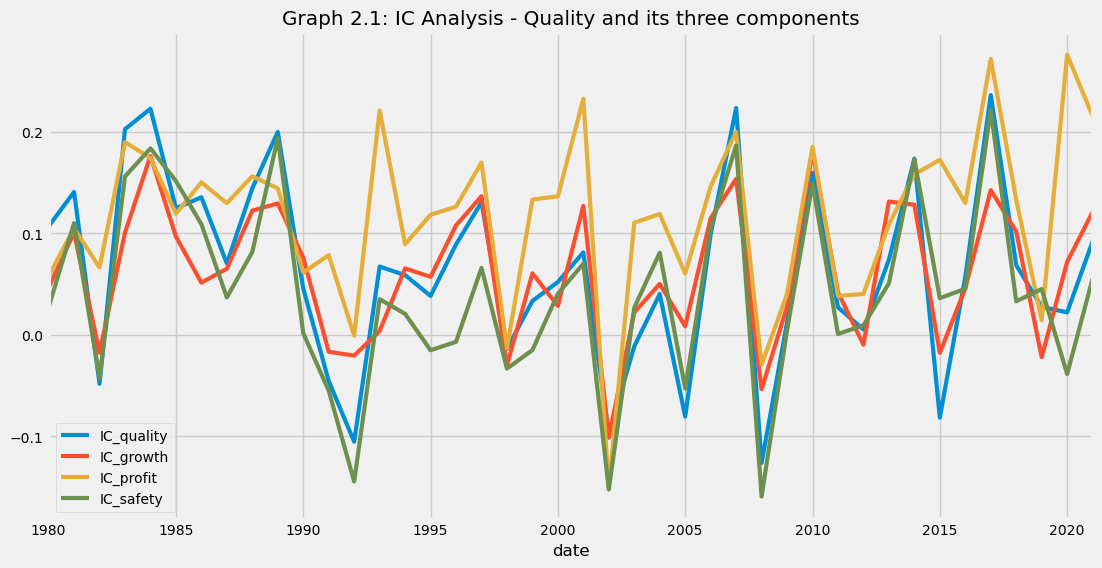

In [13]:
all_signal_ic_graph = all_signal_ic.plot(kind='line',
                                        figsize=(12, 6),
                                        title='Graph 2.1: IC Analysis - Quality and its three components')
plt.savefig('Graph 2.1: IC Analysis - Quality and its three components.png')

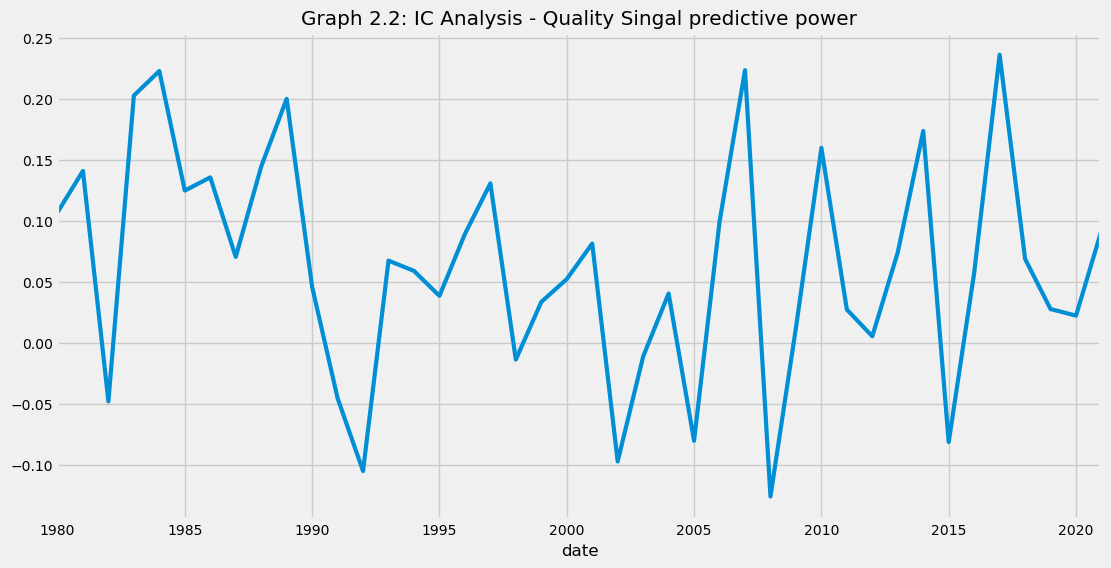

In [14]:
quality_signal_ic_graph = quality_signal_ic.plot(kind='line',
                                                 figsize=(12, 6),
                                                 title='Graph 2.2: IC Analysis - Quality Singal predictive power',
                                                 legend=False)
plt.savefig('Graph 2.2: IC Analysis - Quality Singal predictive power.png')

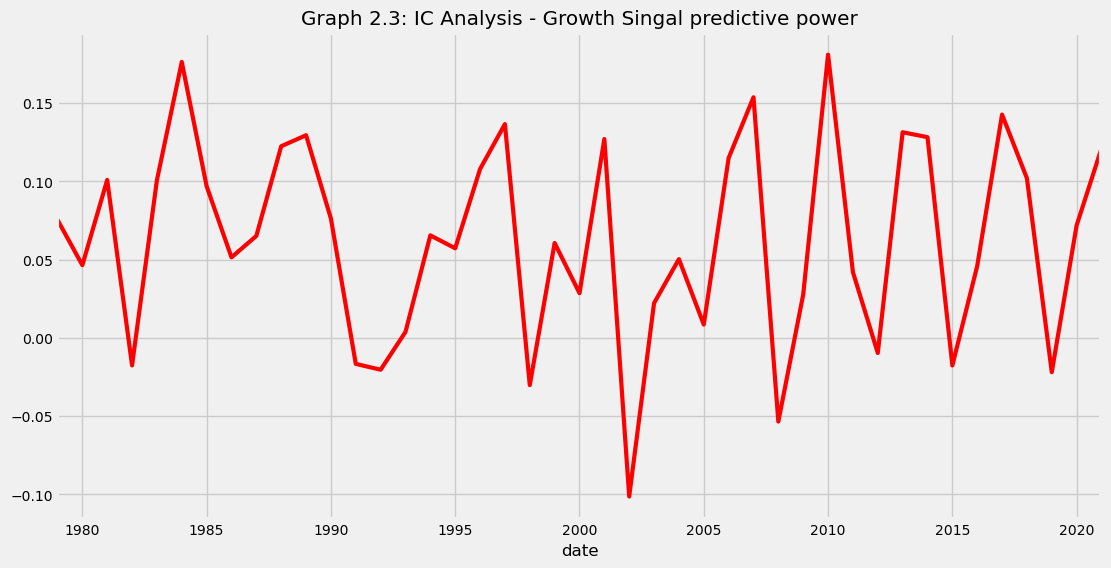

In [15]:
growth_signal_ic_graph = growth_signal_ic.plot(kind='line',
                                               color = 'red',
                                               figsize=(12, 6),
                                               title='Graph 2.3: IC Analysis - Growth Singal predictive power',
                                               legend=False)
plt.savefig('Graph 2.3: IC Analysis - Growth Singal predictive power.png')

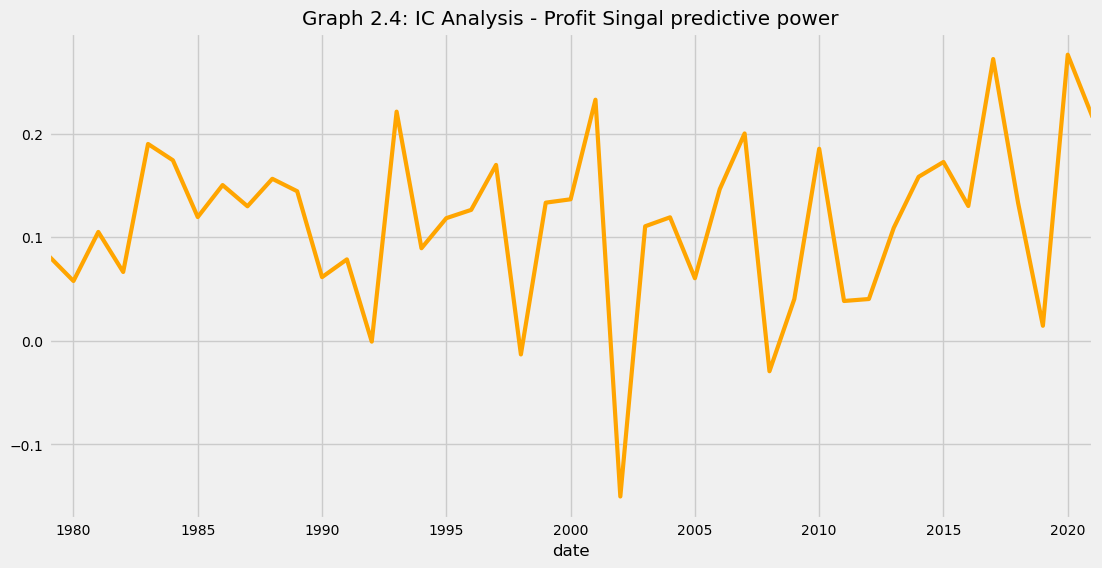

In [16]:
profit_signal_ic_graph = profit_signal_ic.plot(kind='line',
                                               color = 'orange',
                                               figsize=(12, 6),
                                               title='Graph 2.4: IC Analysis - Profit Singal predictive power',
                                               legend=False)
plt.savefig('Graph 2.4: IC Analysis - Profit Singal predictive power.png')

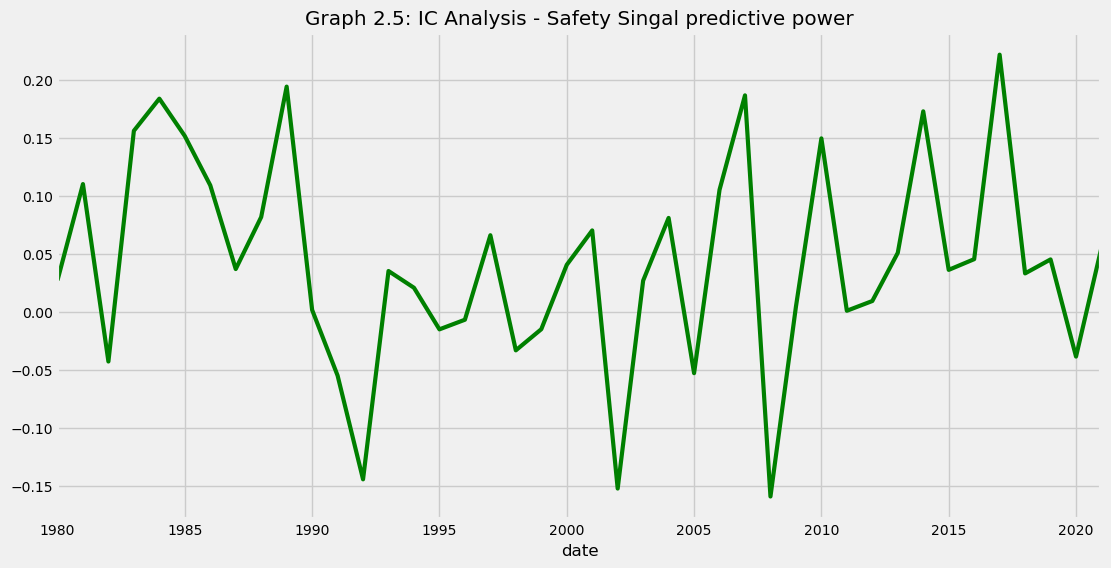

In [17]:
safety_signal_ic_graph = safety_signal_ic.plot(kind='line',
                                               color = 'green',
                                               figsize=(12, 6),
                                               title='Graph 2.5: IC Analysis - Safety Singal predictive power',
                                               legend=False)
plt.savefig('Graph 2.5: IC Analysis - Safety Singal predictive power.png')

Join quality and growth to show the similarity

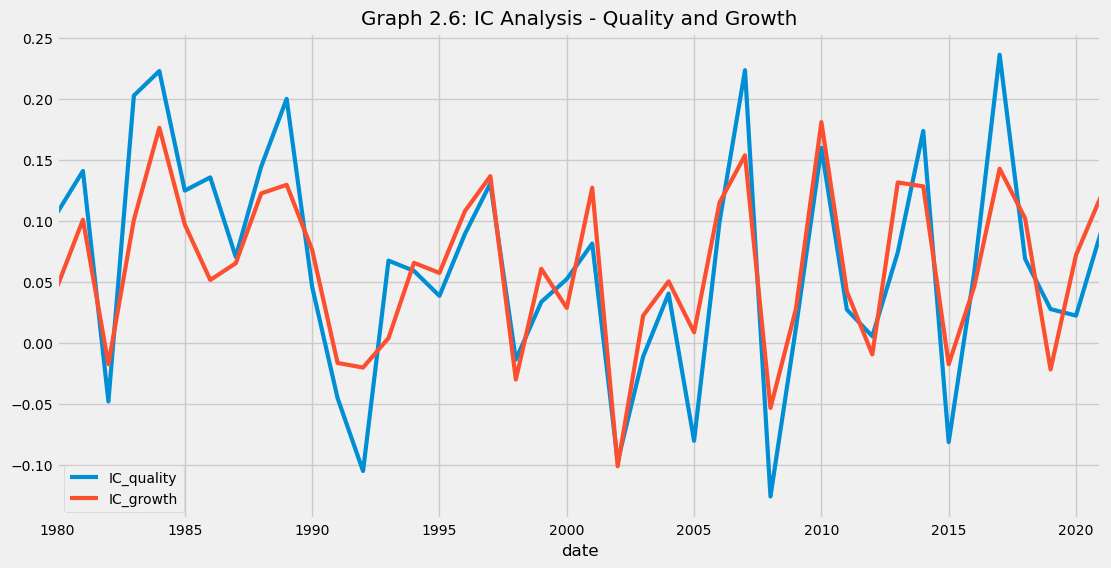

In [18]:
qualityandgrowth_signal_ic = quality_signal_ic.to_frame().join(growth_signal_ic)
qualityandgrowth_signal_ic_graph = qualityandgrowth_signal_ic.plot(kind='line',
                                                                   figsize=(12, 6),
                                                                   title='Graph 2.6: IC Analysis - Quality and Growth')
plt.savefig('Graph 2.6: IC Analysis - Quality and Growth.png')

_____________________________________________________________________________________________________________________

## Part 3: Backtesting

### 3.1 Overall performance from 2005 - 2022

**Step 1: Change the first three argument of the ls_backtesting to series**

In [19]:
quality_signal = quality_signal.squeeze()
prices = prices.squeeze()
market_cap = market_cap.squeeze()

**Step 2: Input eight 9 argument into the ls_backtesting function**
- The first three argument are the three series including: quality signal, the monthly price, the market cap by month.
- The fourth and fifth argument: Be tested on data between 2005 and 2022.
- The sixth argument: Rebalance monthly
- The seveneth argument: Assume 0.2% roundtrip transaction costs.
- The eight argument: Overinvest in the top 250 stocks and underinvest in the bottom 250.
- The ninth argumentHave an active percentage of 30% (should, in fact be a 130/30 strategy).

In [20]:
ls30_ret, ls30_turn, ls30_comp, ls30_perf = ap.ls_backtesting(quality_signal, prices, market_cap, 
                                                              start='2005-01-01', end='2022-12-31', 
                                                              frequency=1, t_cost=0.002, N=250, active=0.3)

**Step 3: Examine the performance of the longshort performance over the 18 years period**

In [21]:
ls30_perf

,LS Portfolio,Benchmark,LS Active
Mean Return,0.104364,0.072373,0.031991
St. Dev.,0.137200,0.148094,0.035084
RR Ratio,0.760668,0.488697,0.911838
% Positive,0.648148,0.652778,0.634259
Worst Month,-0.140865,-0.186403,-0.037991
Best Month,0.106777,0.109407,0.045538
Max DrawDown,-0.455186,-0.608699,-0.120379


### 3.2 Deeper analysis of the performance overtime 

In [22]:
ls_ret0507, ls_turn0507, ls_comp0507, ls_perf0507 = ap.ls_backtesting(quality_signal, prices, market_cap, start='2005-01-01', end='2007-12-31', 
                                                                      frequency=1, t_cost=0.002, N=250, active=0.3)
ls_ret0809, ls_turn0809, ls_comp0809, ls_perf0809 = ap.ls_backtesting(quality_signal, prices, market_cap, start='2008-01-01', end='2009-12-31', 
                                                                      frequency=1, t_cost=0.002, N=250, active=0.3)
ls_ret1012, ls_turn1012, ls_comp1012, ls_perf1012 = ap.ls_backtesting(quality_signal, prices, market_cap, start='2010-01-01', end='2012-12-31', 
                                                                      frequency=1, t_cost=0.002, N=250, active=0.3)
ls_ret1319, ls_turn1319, ls_comp1319, ls_perf1319 = ap.ls_backtesting(quality_signal, prices, market_cap, start='2013-01-01', end='2019-12-31', 
                                                                      frequency=1, t_cost=0.002, N=250, active=0.3)
ls_ret2022, ls_turn2022, ls_comp2022, ls_perf2022 = ap.ls_backtesting(quality_signal, prices, market_cap, start='2020-01-01', end='2021-12-31', 
                                                                      frequency=1, t_cost=0.002, N=250, active=0.3)


In [23]:
ls_perf0507

,LS Portfolio,Benchmark,LS Active
Mean Return,0.102540,0.079537,0.023003
St. Dev.,0.095957,0.099233,0.018253
RR Ratio,1.068608,0.801519,1.260218
% Positive,0.666667,0.666667,0.555556
Worst Month,-0.084321,-0.085820,-0.005843
Best Month,0.051175,0.045716,0.013989
Max DrawDown,-0.096525,-0.118195,-0.017111


In [24]:
ls_perf0809

,LS Portfolio,Benchmark,LS Active
Mean Return,-0.073464,-0.108813,0.035349
St. Dev.,0.187345,0.227676,0.065780
RR Ratio,-0.392133,-0.477930,0.537387
% Positive,0.541667,0.541667,0.583333
Worst Month,-0.140865,-0.186403,-0.037067
Best Month,0.069679,0.076060,0.045538
Max DrawDown,-0.455186,-0.608699,-0.120379


In [25]:
ls_perf1012

,LS Portfolio,Benchmark,LS Active
Mean Return,0.156607,0.121050,0.035556
St. Dev.,0.132066,0.142678,0.022565
RR Ratio,1.185821,0.848414,1.575701
% Positive,0.666667,0.666667,0.722222
Worst Month,-0.065878,-0.075505,-0.012282
Best Month,0.106777,0.098149,0.016368
Max DrawDown,-0.130728,-0.175063,-0.018140


In [26]:
ls_perf1319

,LS Portfolio,Benchmark,LS Active
Mean Return,0.153210,0.106793,0.046418
St. Dev.,0.107800,0.109825,0.026766
RR Ratio,1.421248,0.972387,1.734196
% Positive,0.678571,0.702381,0.690476
Worst Month,-0.073892,-0.094330,-0.021561
Best Month,0.082732,0.073096,0.023826
Max DrawDown,-0.101811,-0.149959,-0.032334


In [27]:
ls_perf2022

,LS Portfolio,Benchmark,LS Active
Mean Return,0.109858,0.132736,-0.022878
St. Dev.,0.177033,0.190244,0.050966
RR Ratio,0.620551,0.697715,-0.448891
% Positive,0.666667,0.666667,0.416667
Worst Month,-0.088129,-0.123310,-0.037991
Best Month,0.095883,0.109407,0.035180
Max DrawDown,-0.069572,-0.062186,-0.115160


_____________________________________________________________________________________________________________________

## Part 4: Optimization

### 4.1 Mean return optimisation

**Step 1: Keep the other constant, let's find the monthly return with the three different number of stock (200 ,250,300) to over and under invest using the for loop.**

Note: Monthly rebalancing is when frequency = 1

In [28]:
stock_over_under = [200,250,300]

monthly_return = []

for stock in stock_over_under:
    ls_ret, ls_turn, ls_comp, ls_perf = ap.ls_backtesting(quality_signal, prices, market_cap, start='2005-01-01', end='2022-12-31',
                                                          frequency=1, t_cost=0.002, N=stock, active=0.3)
    monthly_return.append(ls_perf.loc['Mean Return', 'LS Active'])
    
monthly_return_df = pd.DataFrame(monthly_return, columns=['Monthly return'], index=stock_over_under)
monthly_return_df

,Monthly return
200,0.037643
250,0.031991
300,0.028405


**Step 2: Find the quarterly return**

Note: Quarterly rebalancing is when frequency = 3

In [29]:
stock_over_under = [200,250,300]

quarterly_return = []

for stock in stock_over_under:
    ls_ret, ls_turn, ls_comp, ls_perf = ap.ls_backtesting(quality_signal, prices, market_cap, start='2005-01-01', end='2022-12-31',
                                                          frequency=3, t_cost=0.002, N=stock, active=0.3)
    quarterly_return.append(ls_perf.loc['Mean Return', 'LS Active'])
    
quarterly_return_df = pd.DataFrame(quarterly_return, columns=['Quarterly return'], index=stock_over_under)
quarterly_return_df

,Quarterly return
200,0.032202
250,0.027838
300,0.025023


**Step 3: Find the yearly return**

Note: Yearly rebalancing is when frequency = 12

In [30]:
stock_over_under = [200,250,300]

yearly_return = []

for stock in stock_over_under:
    ls_ret, ls_turn, ls_comp, ls_perf = ap.ls_backtesting(quality_signal, prices, market_cap, start='2005-01-01', end='2022-12-31',
                                                          frequency=12, t_cost=0.002, N=stock, active=0.3)
    yearly_return.append(ls_perf.loc['Mean Return', 'LS Active'])
    
yearly_return_df = pd.DataFrame(yearly_return, columns=['Yearly return'], index=stock_over_under)
yearly_return_df

,Yearly return
200,0.020416
250,0.018323
300,0.017117


**Step 4: Join the three table together to find the optimal combination that produced the best performance**

In [31]:
stock_return_table = monthly_return_df.join([quarterly_return_df, yearly_return_df])
stock_return_table = stock_return_table.rename_axis('Number of stocks over/under invested')
stock_return_table

,Monthly return,Quarterly return,Yearly return
Number of stocks over/under invested,,,
200,0.037643,0.032202,0.020416
250,0.031991,0.027838,0.018323
300,0.028405,0.025023,0.017117


____________________________________________________________________________________________________________________________________________________________

### 4.2 RR ratio optimisation

This 4.2 sections is similar to the four step in section 4.1 above, changing only the mean return to RR ratio to take into account the risk factor

In [32]:
stock_over_under = [200,250,300]
monthly_RR = []
for stock in stock_over_under:
    ls_ret, ls_turn, ls_comp, ls_perf = ap.ls_backtesting(quality_signal, prices, market_cap, start='2005-01-01', end='2022-12-31',
                                                          frequency=1, t_cost=0.002, N=stock, active=0.3)
    monthly_RR.append(ls_perf.loc['RR Ratio', 'LS Active'])  
monthly_RR_df = pd.DataFrame(monthly_RR, columns=['Monthly RR'], index=stock_over_under)
monthly_RR_df

,Monthly RR
200,0.976368
250,0.911838
300,0.887653


In [33]:
stock_over_under = [200,250,300]

quarterly_RR = []

for stock in stock_over_under:
    ls_ret, ls_turn, ls_comp, ls_perf = ap.ls_backtesting(quality_signal, prices, market_cap, start='2005-01-01', end='2022-12-31',
                                                          frequency=3, t_cost=0.002, N=stock, active=0.3)
    quarterly_RR.append(ls_perf.loc['RR Ratio', 'LS Active'])
quarterly_RR_df = pd.DataFrame(quarterly_RR, columns=['Quarterly RR'], index=stock_over_under)
quarterly_RR_df

,Quarterly RR
200,0.860487
250,0.805323
300,0.794493


In [34]:
stock_over_under = [200,250,300]
yearly_RR = []
for stock in stock_over_under:
    ls_ret, ls_turn, ls_comp, ls_perf = ap.ls_backtesting(quality_signal, prices, market_cap, start='2005-01-01', end='2022-12-31',
                                                          frequency=12, t_cost=0.002, N=stock, active=0.3)
    yearly_RR.append(ls_perf.loc['RR Ratio', 'LS Active'])
    
yearly_RR_df = pd.DataFrame(yearly_RR, columns=['Yearly RR'], index=stock_over_under)
yearly_RR_df

,Yearly RR
200,0.679936
250,0.660285
300,0.656530


In [35]:
stock_RR_table = monthly_RR_df.join([quarterly_RR_df, yearly_RR_df])
stock_RR_table = stock_RR_table.rename_axis('Number of stocks over/under invested')
stock_RR_table

,Monthly RR,Quarterly RR,Yearly RR
Number of stocks over/under invested,,,
200,0.976368,0.860487,0.679936
250,0.911838,0.805323,0.660285
300,0.887653,0.794493,0.656530
